In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import isomorphism
# Создание первого графа (линейного)
G1 = nx.Graph()
# Добавление узлов и рёбер с атрибутами
# Примерные данные для узлов и рёбер
nodes_G1 = [(0, {"angle": 90}), (1, {"angle": 90}), (2, {"angle": 90})]
edges_G1 = [(0, 1, {"length": 1.0}), (1, 2, {"length": 1.0})]

G1.add_nodes_from(nodes_G1)
G1.add_edges_from(edges_G1)

# Создание второго графа (двусвязного не направленного)
G2 = nx.Graph()
# Примерные данные для узлов и рёбер
nodes_G2 = [(0, {"angle": 90}), (1, {"angle": 90}), (2, {"angle": 90}), (3, {"angle": 90}), (4, {"angle": 90})]
edges_G2 = [(0, 1, {"length": 1.0}), (1, 2, {"length": 1.0}), (2, 3, {"length": 1.0}), (3, 4, {"length": 1.0}), (0, 4, {"length": 1.0})]

G2.add_nodes_from(nodes_G2)
G2.add_edges_from(edges_G2)

# Определение функции для проверки атрибутов узлов и рёбер
def node_match(n1, n2):
    return n1["angle"] == n2["angle"]

def edge_match(e1, e2):
    return e1["length"] == e2["length"]

# Использование алгоритма VF2 для поиска подграфов
GM = isomorphism.GraphMatcher(G2, G1, node_match=node_match, edge_match=edge_match)
subgraph_isomorphisms = list(GM.subgraph_isomorphisms_iter())

# Вывод результатов
if subgraph_isomorphisms:
    print("Subgraph isomorphisms found!")
    for iso in subgraph_isomorphisms:
        print(iso)
else:
    print("No subgraph isomorphisms found.")

Subgraph isomorphisms found!
{0: 0, 1: 1, 2: 2}
{0: 0, 4: 1, 3: 2}
{1: 0, 0: 1, 4: 2}
{1: 0, 2: 1, 3: 2}
{2: 0, 1: 1, 0: 2}
{2: 0, 3: 1, 4: 2}
{3: 0, 2: 1, 1: 2}
{3: 0, 4: 1, 0: 2}
{4: 0, 0: 1, 1: 2}
{4: 0, 3: 1, 2: 2}


In [36]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

center_point = (41.1579, -8.6291)  
distance = 500

G = ox.graph_from_point(center_point, dist=distance, network_type='drive')
G_undirected = G.to_undirected()

pos = {node: (data['x'], data['y']) for node, data in G_undirected.nodes(data=True)}

In [59]:
import math
def calculate_angle(node1, node2, node3):
    """
    Вычисление угла между тремя узлами.
    """
    # Координаты узлов
    x1, y1 = node1['x'], node1['y']
    x2, y2 = node2['x'], node2['y']
    x3, y3 = node3['x'], node3['y']
    
    # Векторы
    v1 = (x1 - x2, y1 - y2)
    v2 = (x3 - x2, y3 - y2)
    
    # Скалярное произведение и длины векторов
    dot_product = v1[0]*v2[0] + v1[1]*v2[1]
    length_v1 = math.sqrt(v1[0]**2 + v1[1]**2)
    length_v2 = math.sqrt(v2[0]**2 + v2[1]**2)
    
    # Косинус угла
    cos_angle = dot_product / (length_v1 * length_v2)
    
    # Угол в радианах
    angle = math.acos(cos_angle)
    
    return math.degrees(angle)

# Функция для вычисления расстояния между двумя точками (узлами)
def haversine_distance(lat1, lon1, lat2, lon2):
    from math import radians, sin, cos, sqrt, atan2

    # Радиус Земли в метрах
    R = 6371000

    # Преобразование координат в радианы
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Разница координат
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Формула гаверсина
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

def node_match(n1, n2):
    if not n1:
        return False
    return n1["angle"] == n2["angle"]

def edge_match(e1, e2):
    return e1["length"] == e2["length"]


G2 = nx.Graph()
nodes_G2 = []
edges_G2 = []
# Пример расчета углов и расстояний
for node in G.nodes:
    neighbors = list(G.neighbors(node))
    if len(neighbors) >= 2:
        node1 = G.nodes[neighbors[0]]
        node2 = G.nodes[node]
        node3 = G.nodes[neighbors[1]]
        
        angle = calculate_angle(node1, node2, node3)
        # print(f"Angle at node {node} between {neighbors[0]} and {neighbors[1]}: {angle:.2f} degrees")
        nodes_G2.append( (node, {"angle": angle}) )
        
        # вычисляем длину между нодами 
        lat1, lon1 = node1['y'], node1['x']
        lat2, lon2 = node2['y'], node2['x']
        lat3, lon3 = node3['y'], node3['x']
        distance_1_2 = haversine_distance(lat1, lon1, lat2, lon2)
        distance_2_3 = haversine_distance(lat2, lon2, lat3, lon3)
        edges_G2.append( (neighbors[0], node, {"length": distance_1_2}) )
        edges_G2.append( (node, neighbors[1], {"length": distance_2_3}) )

G2.add_nodes_from(nodes_G2)
G2.add_edges_from(edges_G2)


# Создание первого графа (линейного)
G1 = nx.Graph()

nodes_G1 = [
    (90378713, {"angle": 110.65117202190568, 'y': 41.1569695, 'x': -8.6294021, 'street_count': 3}), 
    (3446699979, {"angle": 94.49532952689961, 'y': 41.1570493, 'x': -8.6285578, 'street_count': 3}), 
    (9380255665, {"angle": 178.28526389442922, 'y': 41.1556322, 'x': -8.6274386, 'street_count': 3})
]

edges_G1 = [(90378713, 3446699979, {"length": 71.23928289190468}), (3446699979, 9380255665, {"length": 183.3285523097873})]
G1.add_nodes_from(nodes_G1)
G1.add_edges_from(edges_G1)

# Использование алгоритма VF2 для поиска подграфов
GM = nx.algorithms.isomorphism.GraphMatcher(G2, G1, node_match=node_match, edge_match=edge_match)
subgraph_isomorphisms = list(GM.subgraph_isomorphisms_iter())

# Вывод результатов
if subgraph_isomorphisms:
    print("Subgraph isomorphisms found!")
    for iso in subgraph_isomorphisms:
        print(iso)
else:
    print("No subgraph isomorphisms found.")


Subgraph isomorphisms found!
{90378713: 90378713, 3446699979: 3446699979, 9380255665: 9380255665}


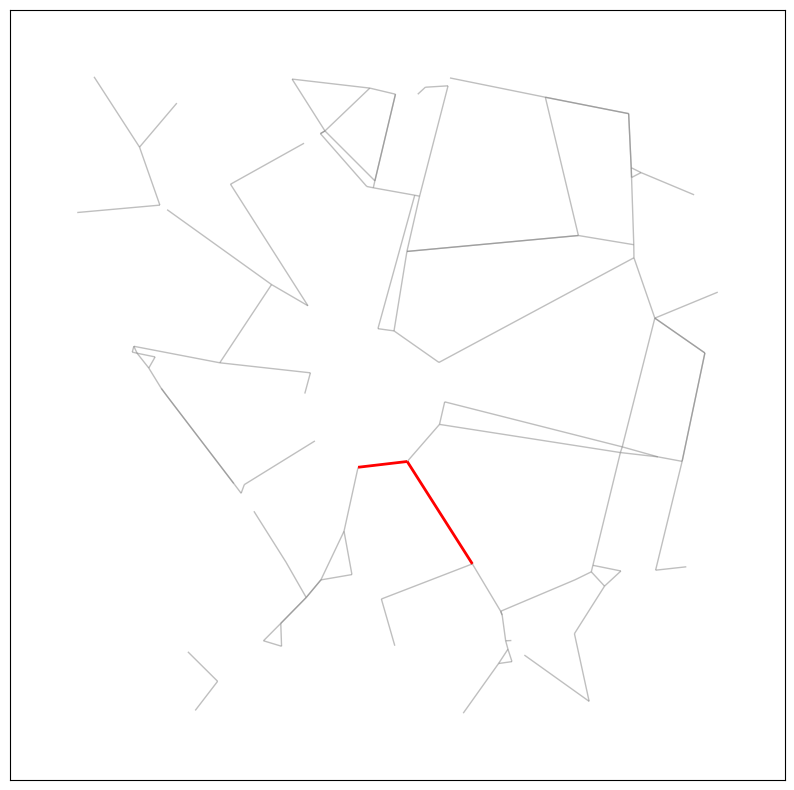

In [60]:

plt.figure(figsize=(10, 10))

nx.draw_networkx_edges(G2, pos, alpha=0.5, edgelist=edges_G2, edge_color='gray')
nx.draw_networkx_edges(G1, pos, node_size=100, edge_color='red', width=2)
plt.show()